In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('engine_data.csv')
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [3]:
df.shape

(19535, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


Plot KDE plots for each feature to visualize their distributions.

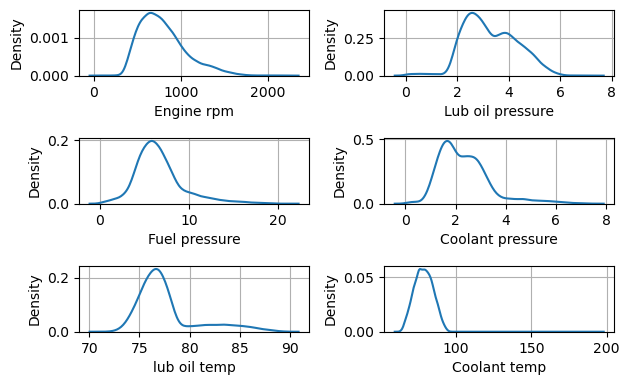

In [5]:
r=4
c=2
it=1
for i in ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp']:
    plt.subplot(r,c,it)
    sns.kdeplot(df[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

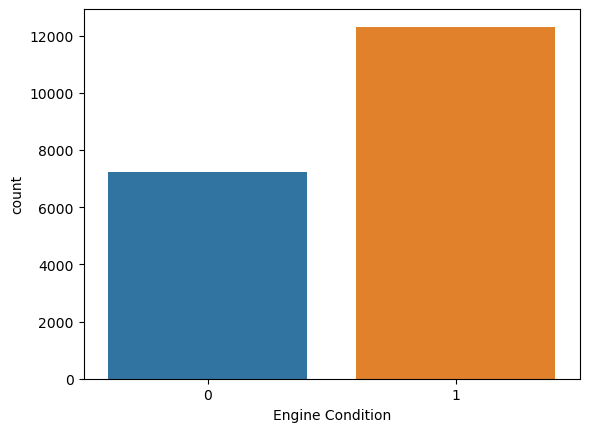

In [6]:
sns.countplot(x=df['Engine Condition'])
plt.show()

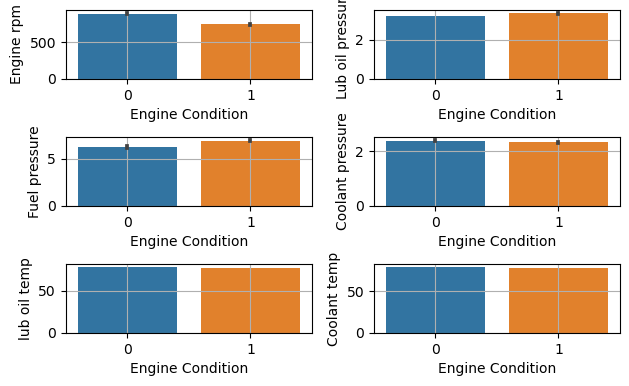

In [7]:
r=4
c=2
it=1
for i in ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp']:
    plt.subplot(r,c,it)
    sns.barplot(x='Engine Condition',y=i,data=df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [8]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [9]:
# statistical test
import scipy.stats as stats

In [10]:
pvalue=[]
for i in ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp']:
    a=df[df['Engine Condition']==0][i]
    b=df[df['Engine Condition']==1][i]
    stat,pval = stats.ttest_ind(a,b)
    pvalue.append(pval)

In [11]:
sig = pd.DataFrame({'Features':['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp'],'p-val':pvalue})
sig

,Features,p-val
0,Engine rpm,0.000000e+00
1,Lub oil pressure,1.599327e-17
2,Fuel pressure,9.309532e-60
3,Coolant pressure,7.729357e-04
4,lub oil temp,2.695837e-39
5,Coolant temp,9.298446e-11


In [16]:
df.head()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [13]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [14]:
#df[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp']] = rs.fit_transform(df[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp']])
#df.head()

In [15]:
import statsmodels.api as sm

In [17]:
y = df['Engine Condition']
x = df.drop('Engine Condition',axis=1)
xc = sm.add_constant(x)
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.608816
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Engine Condition   No. Observations:                19535
Model:                          Logit   Df Residuals:                    19528
Method:                           MLE   Df Model:                            6
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                 0.07571
Time:                        11:39:13   Log-Likelihood:                -11893.
converged:                       True   LL-Null:                       -12867.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.2523      0.431     14.512      0.000       5.408       7.097
Engine rpm 

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)
xtrain = pd.DataFrame(rs.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(rs.fit_transform(xtest),columns=xtrain.columns)

 Initialize various classifiers to compare their performance.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [22]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

For the LogisticRegression()
The TRAIN accuracy is 0.6649846423870118
The ROC score for TRAIN data is 0.5865018711674259


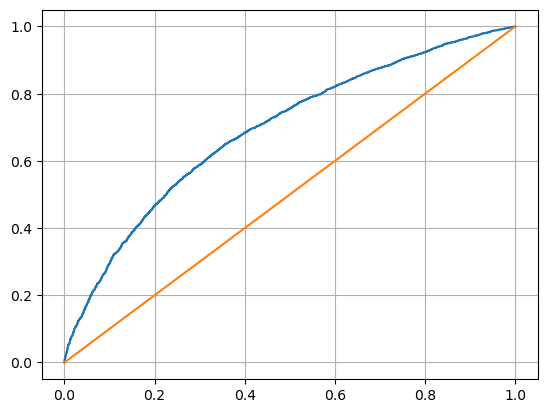

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.6534721037365637
The ROC score for TEST data is 0.5819692789286909


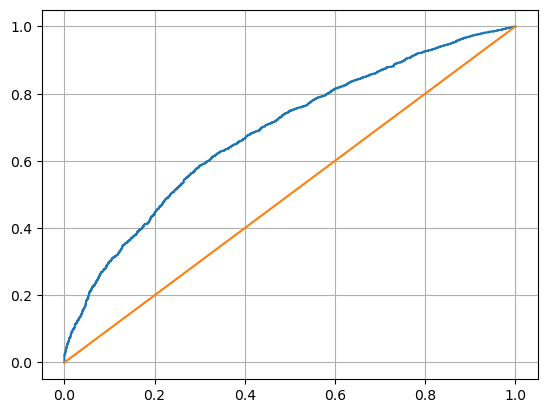

In [23]:
predictor(lr)


For the DecisionTreeClassifier()
The TRAIN accuracy is 1.0
The ROC score for TRAIN data is 1.0


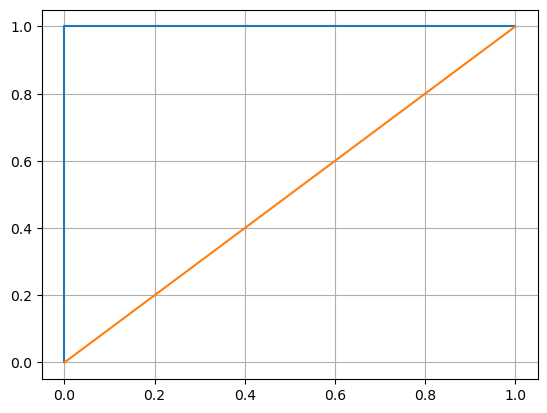

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.5811295000853097
The ROC score for TEST data is 0.5528561793249777


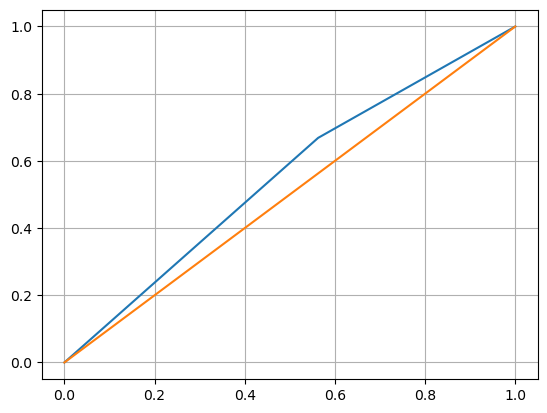

In [24]:
predictor(dt)

For the RandomForestClassifier()
The TRAIN accuracy is 1.0
The ROC score for TRAIN data is 1.0


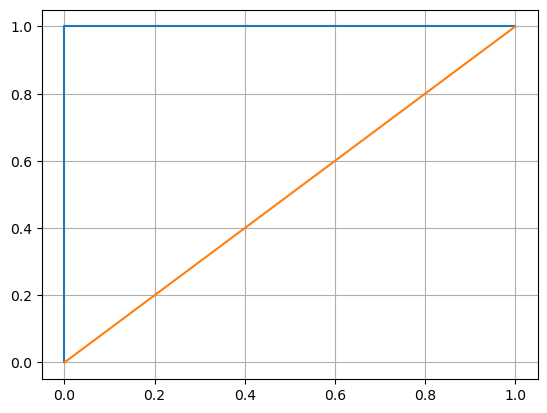

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.6456236137177956
The ROC score for TEST data is 0.5957171986032994


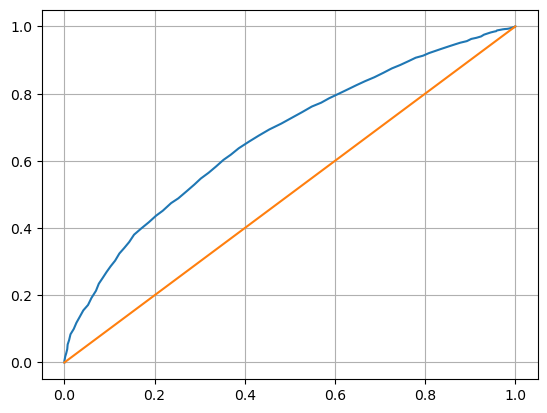

In [25]:
predictor(rf)

For the KNeighborsClassifier()
The TRAIN accuracy is 0.7550826385841743
The ROC score for TRAIN data is 0.7180956273043849


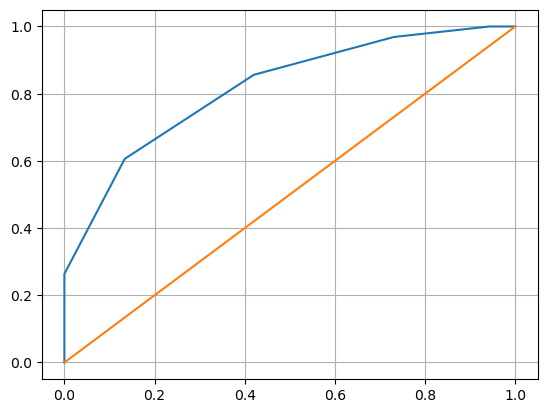

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.629414775635557
The ROC score for TEST data is 0.5857985762016472


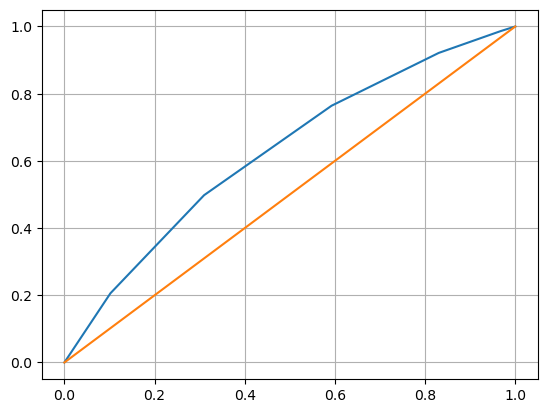

In [26]:
predictor(knn)


For the GaussianNB()
The TRAIN accuracy is 0.6568670469504169
The ROC score for TRAIN data is 0.5829734828054511


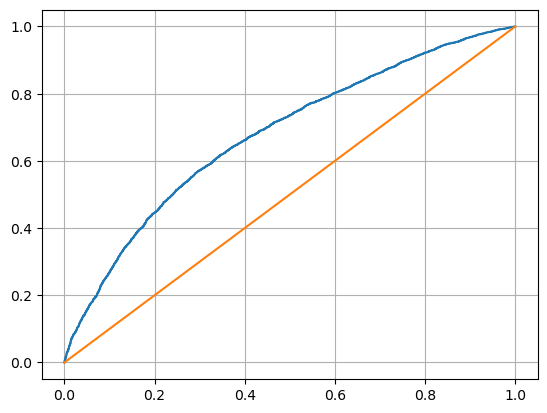

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.6469885685036684
The ROC score for TEST data is 0.5799540353049084


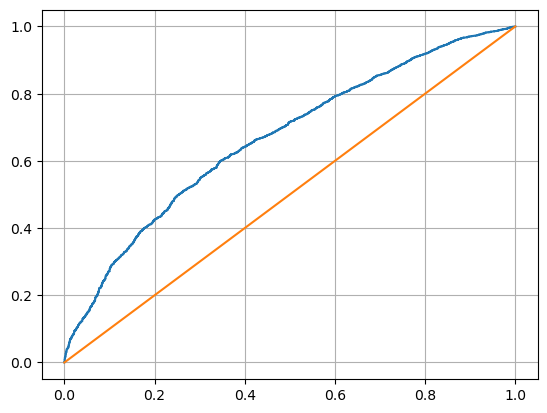

In [27]:
predictor(gnb)

In [28]:
# Optimising the algorithms
from sklearn.model_selection import GridSearchCV

In [29]:
dt = DecisionTreeClassifier()
params = [{'criterion':['gini','entropy'],'max_depth':range(2,6),'min_samples_leaf':range(2,5)}]
grd = GridSearchCV(estimator=dt,param_grid=params)
grd_model = grd.fit(xtrain,ytrain)
grd_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

In [30]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=2)
dt_model = dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [31]:
y_pred_train = dt_model.predict(xtrain)
y_pred_test = dt_model.predict(xtest)
accuracy_score(ytrain,y_pred_train),accuracy_score(ytest,y_pred_test)

(0.6700307152259763, 0.6500597167718819)

In [ ]:
#RandomForest

In [33]:
rf = RandomForestClassifier()
params = [{'n_estimators':[100,150,200],'max_depth':range(2,6),'min_samples_leaf':range(2,5)}]
grd = GridSearchCV(estimator=rf,param_grid=params)
grd_model = grd.fit(xtrain,ytrain)
grd_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 200}

In [34]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2)
rf_model = rf.fit(xtrain,ytrain)
rf_model

RandomForestClassifier(max_depth=5, min_samples_leaf=2)

In [35]:
y_pred_train = rf_model.predict(xtrain)
y_pred_test = rf_model.predict(xtest)
accuracy_score(ytrain,y_pred_train),accuracy_score(ytest,y_pred_test)

(0.6803422553751646, 0.6556901552636069)

In [ ]:
#KNN

In [36]:
knn = KNeighborsClassifier()
params = [{'n_neighbors':[3,5,7,9,11],'metric':['euclidean','manhattan']}]
grd = GridSearchCV(estimator=knn,param_grid=params)
grd_model = grd.fit(xtrain,ytrain)
grd_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [37]:
knn = KNeighborsClassifier(n_neighbors=11,metric='euclidean')
knn_model = knn.fit(xtrain,ytrain)
knn_model

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [38]:
y_pred_train = knn_model.predict(xtrain)
y_pred_test = knn_model.predict(xtest)
accuracy_score(ytrain,y_pred_train),accuracy_score(ytest,y_pred_test)

(0.7152991077958168, 0.6416993687084115)

# Feature Importances

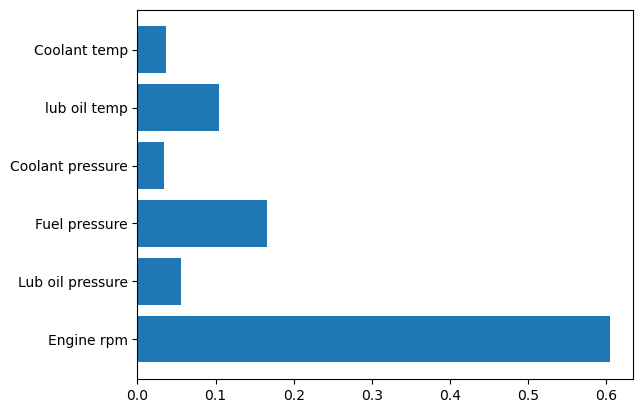

In [39]:
plt.barh(xtrain.columns,rf.fit(xtrain,ytrain).feature_importances_)
plt.show()